# Guided Project: Storytelling Data Visualization on Exchange Rates

The dataset I'll be using describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

[Daria Chemkaeva](https://www.kaggle.com/lsind18) put together the data set and made it available on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank.

*Note that the dataset gets regular updates — dataquest downloaded this dataset on January 2021.*

In [1]:
# Reading in the data set
import pandas as pd
exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")

In [2]:
# Inspecting first 5 rows of dataset
print(exchange_rates.head())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [3]:
# Inspecting last 5 rows of dataset
print(exchange_rates.tail())

     Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
5694   1999-01-08               1.8406              NaN               NaN   
5695   1999-01-07               1.8474              NaN               NaN   
5696   1999-01-06               1.8820              NaN               NaN   
5697   1999-01-05               1.8944              NaN               NaN   
5698   1999-01-04               1.9100              NaN               NaN   

     [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ]  \
5694             1.7643         1.6138                      NaN   
5695             1.7602         1.6165                      NaN   
5696             1.7711         1.6116                      NaN   
5697             1.7965         1.6123                      NaN   
5698             1.8004         1.6168                      NaN   

     [Cypriot pound ] [Czech koruna ] [Danish krone ]  ... [Romanian leu ]  \
5694          0.58187          34.938          7.4433  .

In [4]:
# Checking basic facts about the dataset
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

Reading the above, we can observe the following:
- There are 41 columns
- Some columns do contain null-values (e.g. Greek Drachma only has 520 entries compated to 5699 for most currencies)
- Most columns are an "object" data type, while some are "floats"

## Data Cleaning

Before we start creating data visualizations, we'll need to do a bit of data cleaning:

- We rename the "[US dollar ]" and "Period\Unit:" columns to something easier to type — "US_dollar" and "Time".
- We change the Time column to a datetime data type.
- We sort the values by Time in ascending order.
- We reset the index (and drop the initial index).

In [5]:
# Renaming columns
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)

# Converting time column to datetime type
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

# Sorting values and resetting index
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [6]:
#Isolating Time and US_dollar columns
euro_to_dollar = pd.DataFrame().assign(Time=exchange_rates['Time'], US_dollar=exchange_rates['US_dollar'])

In [7]:
# Running Series.value_counts() to check if anything is wrong
print(euro_to_dollar["US_dollar"].value_counts())

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2184     1
1.1421     1
1.4966     1
1.1919     1
1.4738     1
Name: US_dollar, Length: 3528, dtype: int64


We can see that there are 62 entries with a "-" character.

In [8]:
# Replacing "-" character with ""
euro_to_dollar["US_dollar"] = euro_to_dollar["US_dollar"].str.replace("-","")

# Dropping empty rows 
filter = euro_to_dollar["US_dollar"] != ""
euro_to_dollar = euro_to_dollar[filter]

# Converting column to float
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

## Rolling Mean

In [9]:
# Calculating the rolling means for US_dollar
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

## Coming up with an Idea

Example ideas for data analysis:
- We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
- We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
- We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

I will analyse how the euro-dollar rate had changed during the [Annexation of Crimea by the Russian Federation in 2014](https://en.wikipedia.org/wiki/Annexation_of_Crimea_by_the_Russian_Federation). I will use data from 2011-2013 as a baseline, and will use a line plot.

This line plot will start at the beginning of 2012, and go through to the end of 2015. The duration of annexation event will be highlighted, and the exchange rate line after the start of the event will be a different colour.

## Coding the Graph

In [42]:
# Importing matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates
import datetime as dt

# Code to prevent error within Dataquest environment
%matplotlib inline

In [11]:
# Splitting the dataset
euro_to_dollar_bol1 = (euro_to_dollar['Time'] >= "2012-01-01") & (euro_to_dollar['Time'] <= "2014-02-19")
euro_to_dollar_select1 = euro_to_dollar[euro_to_dollar_bol1]

euro_to_dollar_bol2 = (euro_to_dollar['Time'] > "2014-02-19") & (euro_to_dollar['Time'] <= "2015-12-31")
euro_to_dollar_select2 = euro_to_dollar[euro_to_dollar_bol2]

In [12]:
# Checking selections
print(euro_to_dollar_select1.head())
print(euro_to_dollar_select1.tail())
print(euro_to_dollar_select2.head())
print(euro_to_dollar_select2.tail())

           Time  US_dollar  rolling_mean
3390 2012-01-02     1.2935      1.322597
3391 2012-01-03     1.3014      1.321117
3392 2012-01-04     1.2948      1.319160
3393 2012-01-05     1.2832      1.317310
3394 2012-01-06     1.2776      1.315320
           Time  US_dollar  rolling_mean
3934 2014-02-13     1.3675      1.359860
3935 2014-02-14     1.3707      1.360103
3936 2014-02-17     1.3699      1.360427
3937 2014-02-18     1.3731      1.360727
3938 2014-02-19     1.3745      1.361230
           Time  US_dollar  rolling_mean
3939 2014-02-20     1.3706      1.361543
3940 2014-02-21     1.3707      1.361943
3941 2014-02-24     1.3735      1.362213
3942 2014-02-25     1.3754      1.362503
3943 2014-02-26     1.3726      1.362903
           Time  US_dollar  rolling_mean
4410 2015-12-24     1.0947      1.078027
4411 2015-12-28     1.0962      1.078687
4412 2015-12-29     1.0952      1.079450
4413 2015-12-30     1.0926      1.080303
4414 2015-12-31     1.0887      1.081040


From the check above, we can see that the code has correctly selected the relevant data.

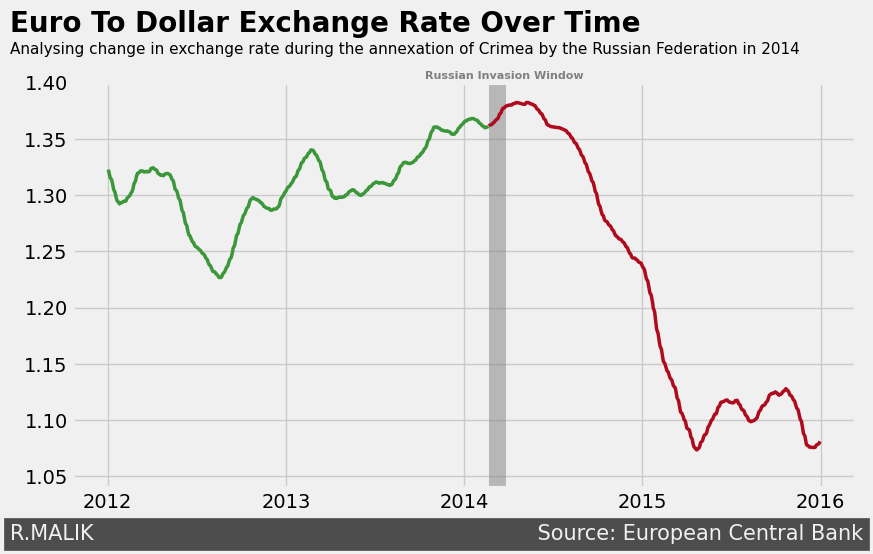

In [70]:
# Constructing the graph

# Applying the FiveThirtyEight style
style.use('fivethirtyeight')

# Adjusting plot size
fig, ax = plt.subplots(figsize=(9, 5))

# Adjusting the x-ticks
ax.xaxis.set_major_locator(mdates.YearLocator(1))

# Adjusting y-limit
plt.ylim(1.04,1.4)

# Adding title and subtitle
plt.text(-0.08, 1.18, 'Euro To Dollar Exchange Rate Over Time',
         weight="bold", size=20,
         ha='left', va='top', transform=ax.transAxes)

plt.text(-0.08, 1.10, 'Analysing change in exchange rate during the annexation of Crimea by the Russian Federation in 2014',
         #weight="bold",
         size=11, ha='left', va='top', transform=ax.transAxes)

# Highlighting Russian invasion window
ax.axvspan(dt.datetime(2014, 2, 20), dt.datetime(2014, 3, 26),
           color='grey', alpha=0.5)

plt.text(0.45, 1.03, 'Russian Invasion Window',
         weight="bold",
         size=8, color="grey", ha='left', va='top', transform=ax.transAxes)

# Adding signature
ax.text(-0.08, -0.09, 'R.MALIK'+' '*67+'Source: European Central Bank',
        color='#f0f0f0', backgroundcolor='#4d4d4d', size=15,
        ha='left', va='top', transform=ax.transAxes)

# Plotting lines
plt.plot(euro_to_dollar_select1["Time"], euro_to_dollar_select1["rolling_mean"],
        color='#3B9739', linewidth=2.5)

plt.plot(euro_to_dollar_select2["Time"], euro_to_dollar_select2["rolling_mean"],
        color='#af0b1e', linewidth=2.5)
plt.show()

From analysing the above data, we can see that the Euro to Dollar exchange rate increases during the invastion, peaks slightly during the following months, then drops substantially.

This could be due to multiple factors. As the invasion commenced, the Euro would have weakened due to instability in Europe. Following the conclusion of the invasion, and due to the oil crisis of 2014, the Dollar then proceeded to crash.